This script calculates an airfoil and outputs it to a format to be read by gmsh works for gmsh 4.7.1

In [1]:
#import common modules
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

# import fish utility modules
import airfoil as ar

First we specify the thickness and chord length and then call the naca4 function in `airfoil.py`.  The format for that function is naca4(x_coordinates, thickness, camber, location of max thickness, closed trailing edge, chord length)  

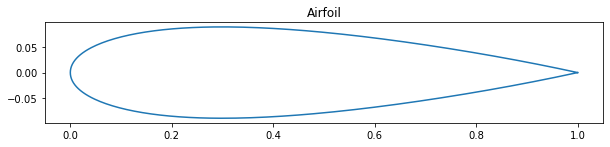

In [2]:
# half-cosine spacing
coord_points = 200   # number of points for upper and lower surface
beta = np.linspace(0, np.pi, coord_points)
dx = (0.5*(1-np.cos(beta)))
# uniform spacing
#dx = np.linspace(0.0, chord, 200)

chord = 1.0   # chord
t = 0.18   # thickness
m = 0.0    # camber
p = 0.3    # location of maximum camber
TE = True  # trailing edge closed

# call the functoin
x, y = ar.naca4(dx, t, m, p, TE, chord)
X, Y = ar.convert_to_coordinates(x, y)

# plot the results
f1, ax1 = plt.subplots(figsize=(10,20))
ax1.plot(X, Y)
ax1.set_title('Airfoil')
ax1.set_aspect('equal')

Write to a .txt file

In [3]:
# Create array for writing
output_data = np.array(list(zip(X, Y, np.zeros(len(X), dtype=float))))

We can make things easier by defining a characteristic length for the mesh and a fluid domain based on the geometry

In this case:

all variables are a factor of total length e.g. 40 is 40 * length of airfoil

Lx_plus = length behind the airfoil

Lx_minus = length in front of airfoil

Ly = length top and bottom of airfoil

In [4]:
output_file = 'naca0018.txt'
np.savetxt(output_file, output_data, delimiter='\t', fmt='%f')